# Exploratory feature engineering

In [1]:
%pip install PyWavelets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_fetcher import get_raw_data
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

from src.visualization.plotting import plot_correlation_matrix



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()



x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
x_whole.reset_index(drop=True, inplace=True)
y_whole.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)


x_whole.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,any_precip,sun_addition,is_freezing,is_snow,is_rain
0,4.675,1.23925,0.000000e+00,0.000000,2067.925049,0.0,272.924988,0.000000,0.000000,0.000000,0.000000,91.949997,0.0,1.0,988.150024,0.0,0.0,975.549988,981.574951,0.0,0.0,65.949997,987.650024,252.160492,0.0,279.774994,98.974998,45661.750000,3.800,1.100,3.625,0.0,1,0,0,-0.638384,0.769718,-0.866025,-0.500000,0.000000,0.000000,0.000000,0.000000,0.929022,1,0.0,0.000000,0,0,0
1,4.400,1.23625,4.938225e+04,20.875000,1698.875000,0.0,271.975006,19.175001,43152.023438,2.250000,4051.275146,73.699997,1.0,0.0,983.750000,0.0,0.0,970.849976,976.950012,0.0,0.0,70.324997,982.950012,168.481506,0.0,278.000000,93.649994,54169.699219,3.850,-3.775,0.600,0.0,0,1,0,-0.308812,0.951123,0.500000,-0.866025,43.143753,0.048057,0.082039,-0.550001,0.786973,1,0.0,21.425001,0,0,0
2,11.350,1.21775,9.830708e+04,58.775002,124.950005,0.0,286.299988,32.450001,65975.726562,1.000000,1871.175049,86.474998,1.0,0.0,1012.650024,0.0,0.0,999.950012,1005.925049,0.0,0.0,90.275002,1011.925049,69.381248,0.0,287.549988,99.900002,33840.726562,1.825,1.600,0.825,0.0,0,1,0,-0.653160,-0.757220,0.866025,0.500000,32.450001,0.108581,0.019034,25.325001,0.865616,1,0.0,33.450001,0,0,0
3,4.150,1.30050,0.000000e+00,0.000000,5375.950195,0.0,271.125000,0.000000,0.000000,0.000000,0.000000,64.849998,0.0,1.0,1019.299988,0.0,0.0,1006.150024,1012.450012,0.0,0.0,78.275002,1018.849976,15.757500,0.0,273.549988,95.625000,28736.724609,1.950,-0.550,1.850,0.0,1,0,0,0.855075,-0.518505,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.678170,1,0.0,0.000000,0,0,0
4,4.300,1.25400,1.162696e+06,378.500000,1466.699951,0.0,271.675018,87.324997,286677.937500,278.799988,848206.062500,24.150000,1.0,0.0,1009.900024,0.0,0.0,996.875000,1003.000000,0.0,0.0,52.099998,1009.150024,130.110260,0.0,278.500000,48.250000,42909.300781,1.000,-0.775,0.675,0.0,0,1,0,0.999930,-0.011826,0.866025,-0.500000,24346.208984,0.394620,0.729517,12.375015,0.500518,0,0.0,366.125000,0,0,0


## Removing of features with low variance

In [3]:
# Find name of all the columns that have a correlation of 0.9 or higher with pv_measurement
data_with_target = pd.concat([x_whole, y_whole], axis=1)

# Apply the mask to get the desired rows


# Drop these rows
# data_with_target = data_with_target.drop(data_with_target[(data_with_target['location_b'] == 1) | (data_with_target['location_c'] == 1)].index)
corr_matrix = data_with_target.corr()
corr_matrix["pv_measurement"].sort_values(ascending=False)


pv_measurement                    1.000000
sun_addition                      0.681311
direct_rad:W                      0.643783
sun_product                       0.634626
direct_rad_1h:J                   0.634289
clear_sky_rad:W                   0.627679
modified_solar_elevation          0.623012
clear_sky_energy_1h:J             0.618767
diffuse_rad:W                     0.554667
diffuse_rad_1h:J                  0.549348
effective_radiation               0.440274
is_day:idx                        0.418755
location_a                        0.348975
residual_radiation                0.333499
t_1000hPa:K                       0.294571
dew_point_2m:K                    0.225750
absolute_humidity_2m:gm3          0.220852
visibility:m                      0.163946
pressure_100m:hPa                 0.156080
pressure_50m:hPa                  0.152076
sfc_pressure:hPa                  0.148064
msl_pressure:hPa                  0.137415
sin_hour                          0.131889
cloud_base_

In [15]:
correlation_matrix = corr_matrix

# Create a mask to ignore self-correlation
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Create a DataFrame from the mask array, keeping the column and index labels
masked_corr = pd.DataFrame(
    correlation_matrix.where(mask),
    columns=correlation_matrix.columns,
    index=correlation_matrix.index
)

# Reset index to move the DataFrame's indices to columns for melting
masked_corr = masked_corr.reset_index()

# "Melt" the DataFrame, converting it from wide format to long format
long_format = masked_corr.melt(id_vars='index', value_name='correlation')

# Drop NaN values which represent the duplicated and self-correlation values
long_format = long_format.dropna(subset=['correlation'])

# Sort the values by the absolute value of correlation, descending
sorted_correlation = long_format.reindex(
    long_format.correlation.abs().sort_values(ascending=False).index
)

# Now, 'sorted_correlation' is a DataFrame with 'index' as one feature, 'variable' as the second feature,
# and their correlation in 'correlation', sorted from most to least correlated
print(sorted_correlation)

C:\Users\gunna\AppData\Local\Temp\ipykernel_25564\1651254901.py:4: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

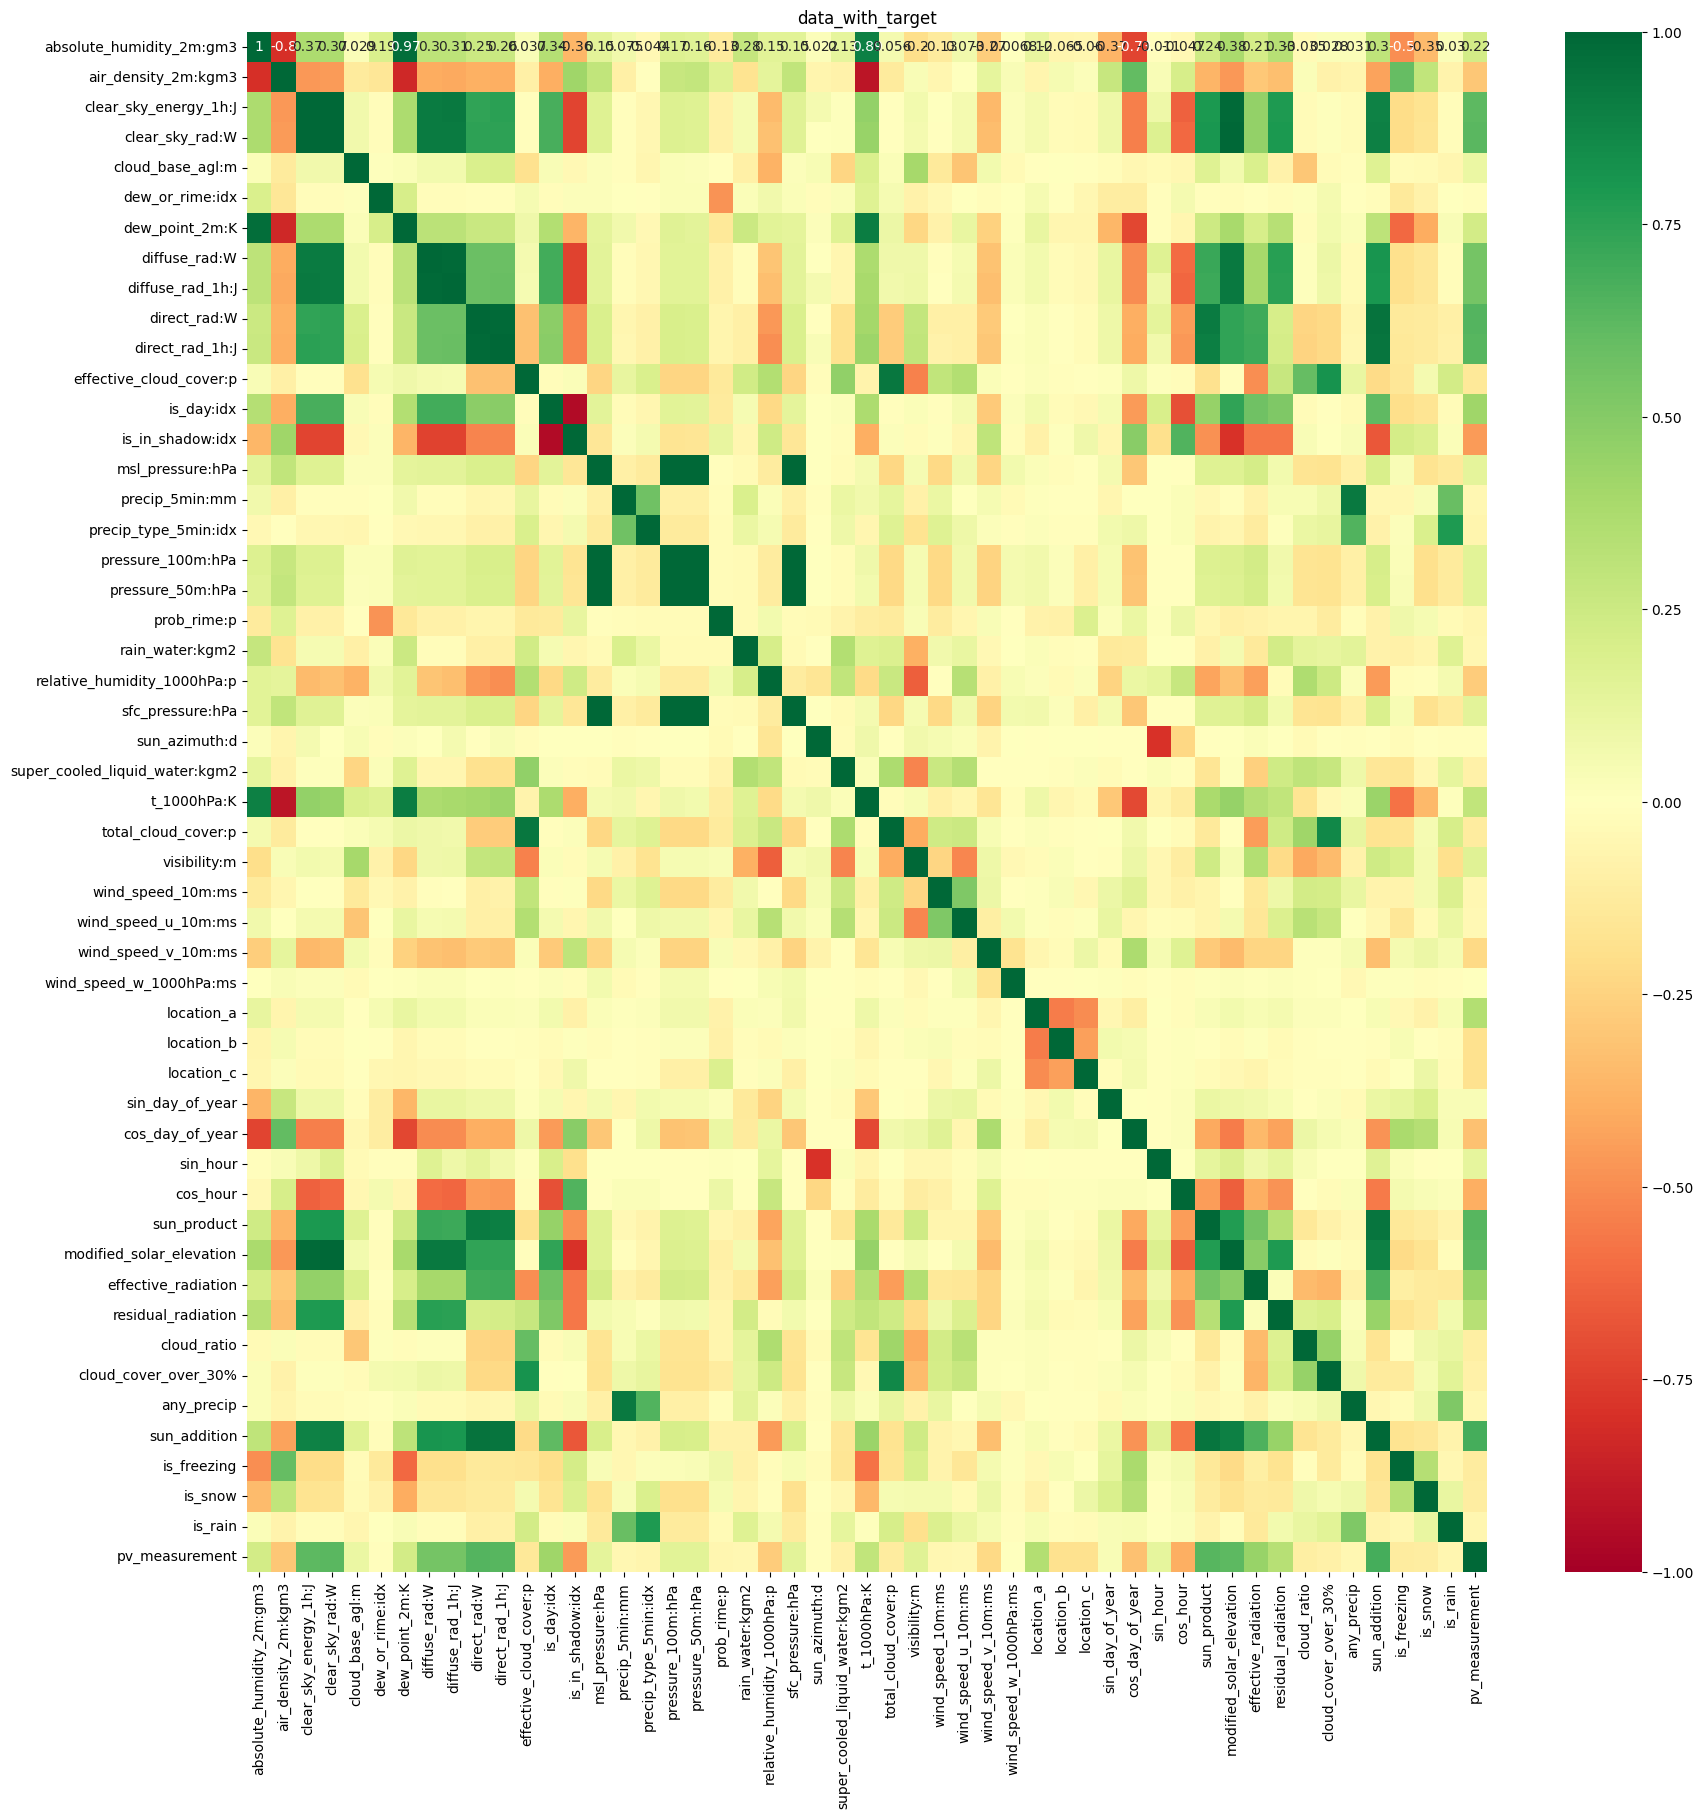

In [4]:

data_with_target = pd.concat([x_whole, y_whole], axis=1)



plot_correlation_matrix(data_with_target, "data_with_target", show=True)

In [5]:
# data_with_target = data_with_target[data_with_target['effective_cloud_cover:p'] < 50]
# data_with_target = data_with_target[data_with_target['precip_5min:mm'] == 0]

In [6]:
data_with_target.shape

(77049, 51)

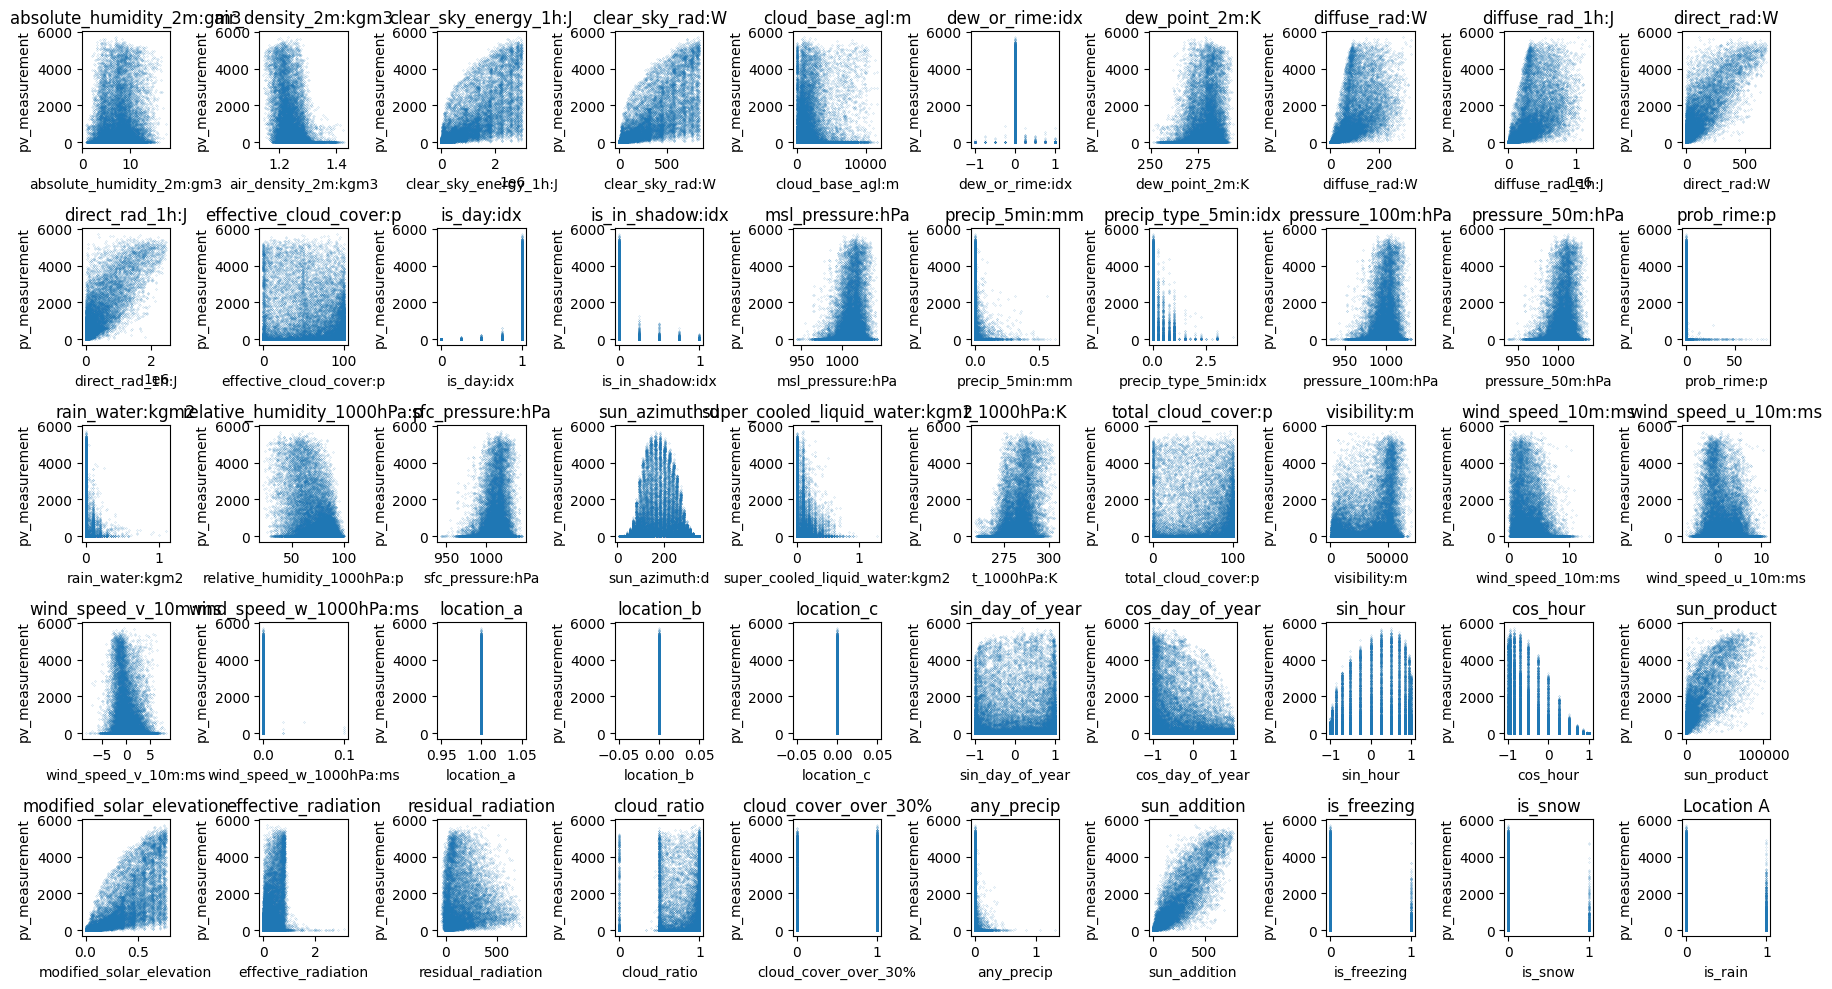

In [7]:
data_with_target_a = data_with_target[data_with_target['location_a'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_a.columns):
    ax.scatter(data_with_target_a[feature], data_with_target_a['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location A")
plt.savefig("results/figures/feature_engineering/location_a_correlation_with_pv.png")
plt.show()

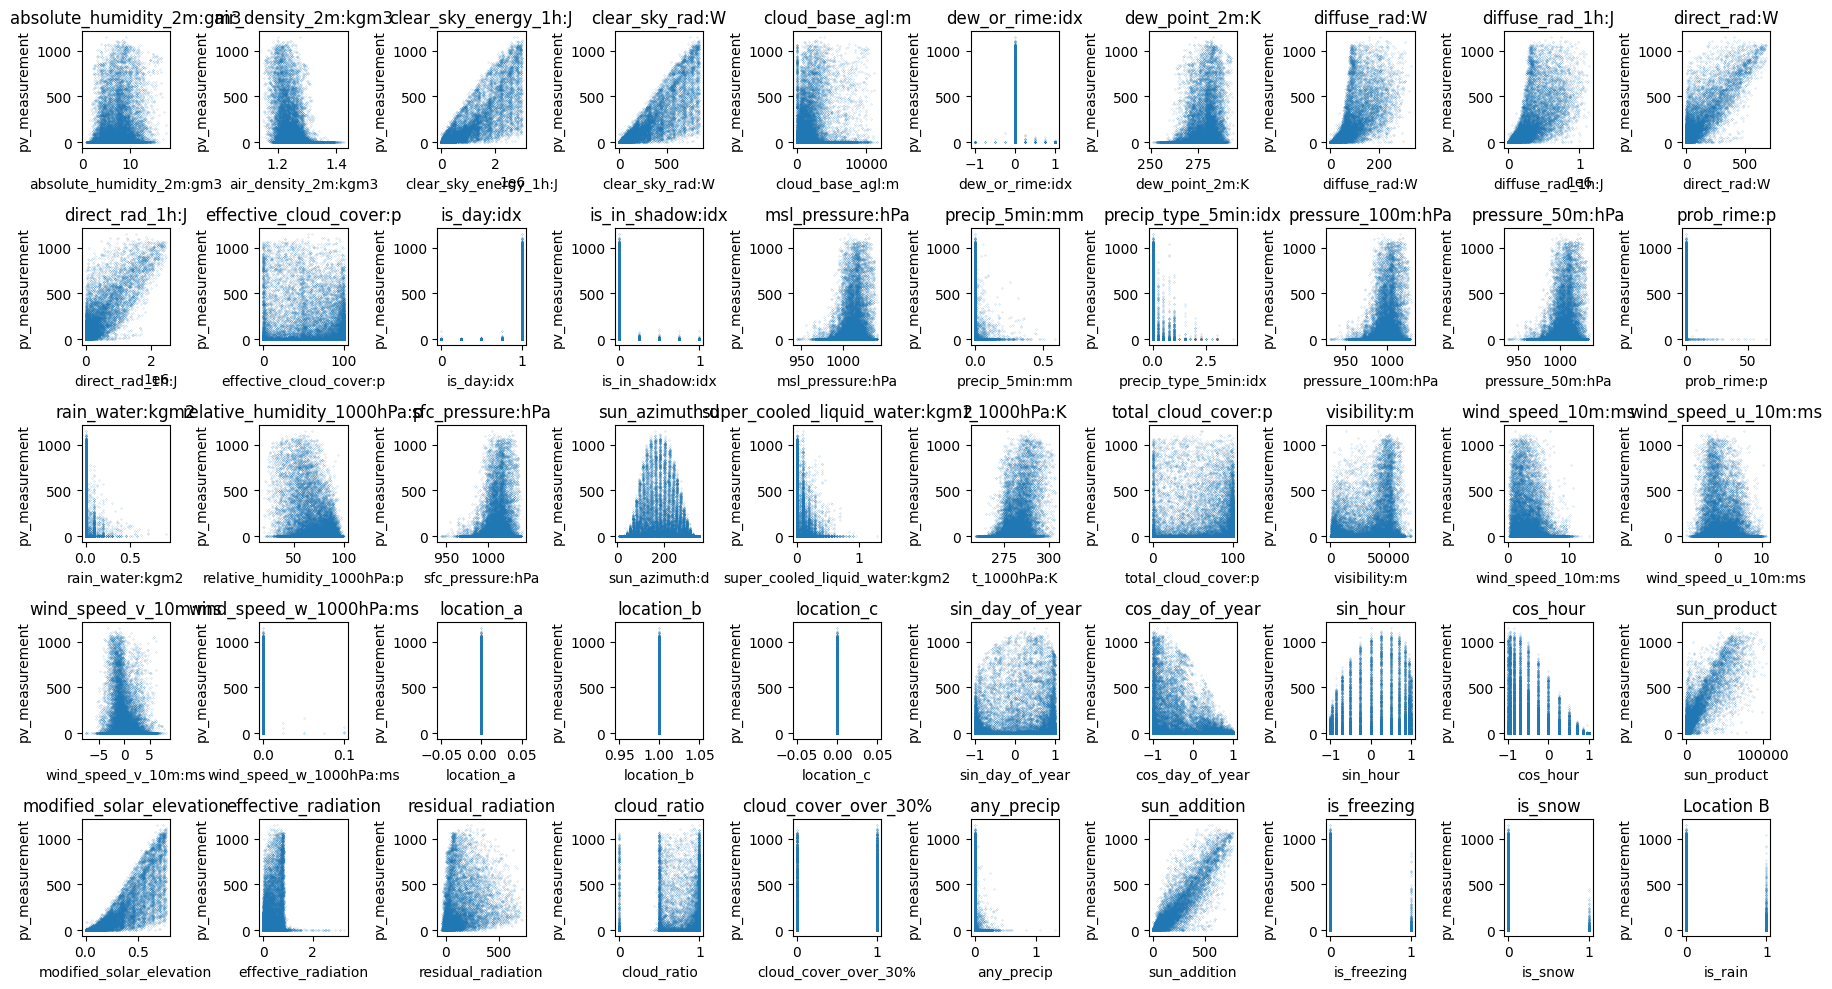

In [8]:
data_with_target_b = data_with_target[data_with_target['location_b'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_b.columns):
    ax.scatter(data_with_target_b[feature], data_with_target_b['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location B")
plt.savefig("results/figures/feature_engineering/location_b_correlation_with_pv.png")
plt.show()

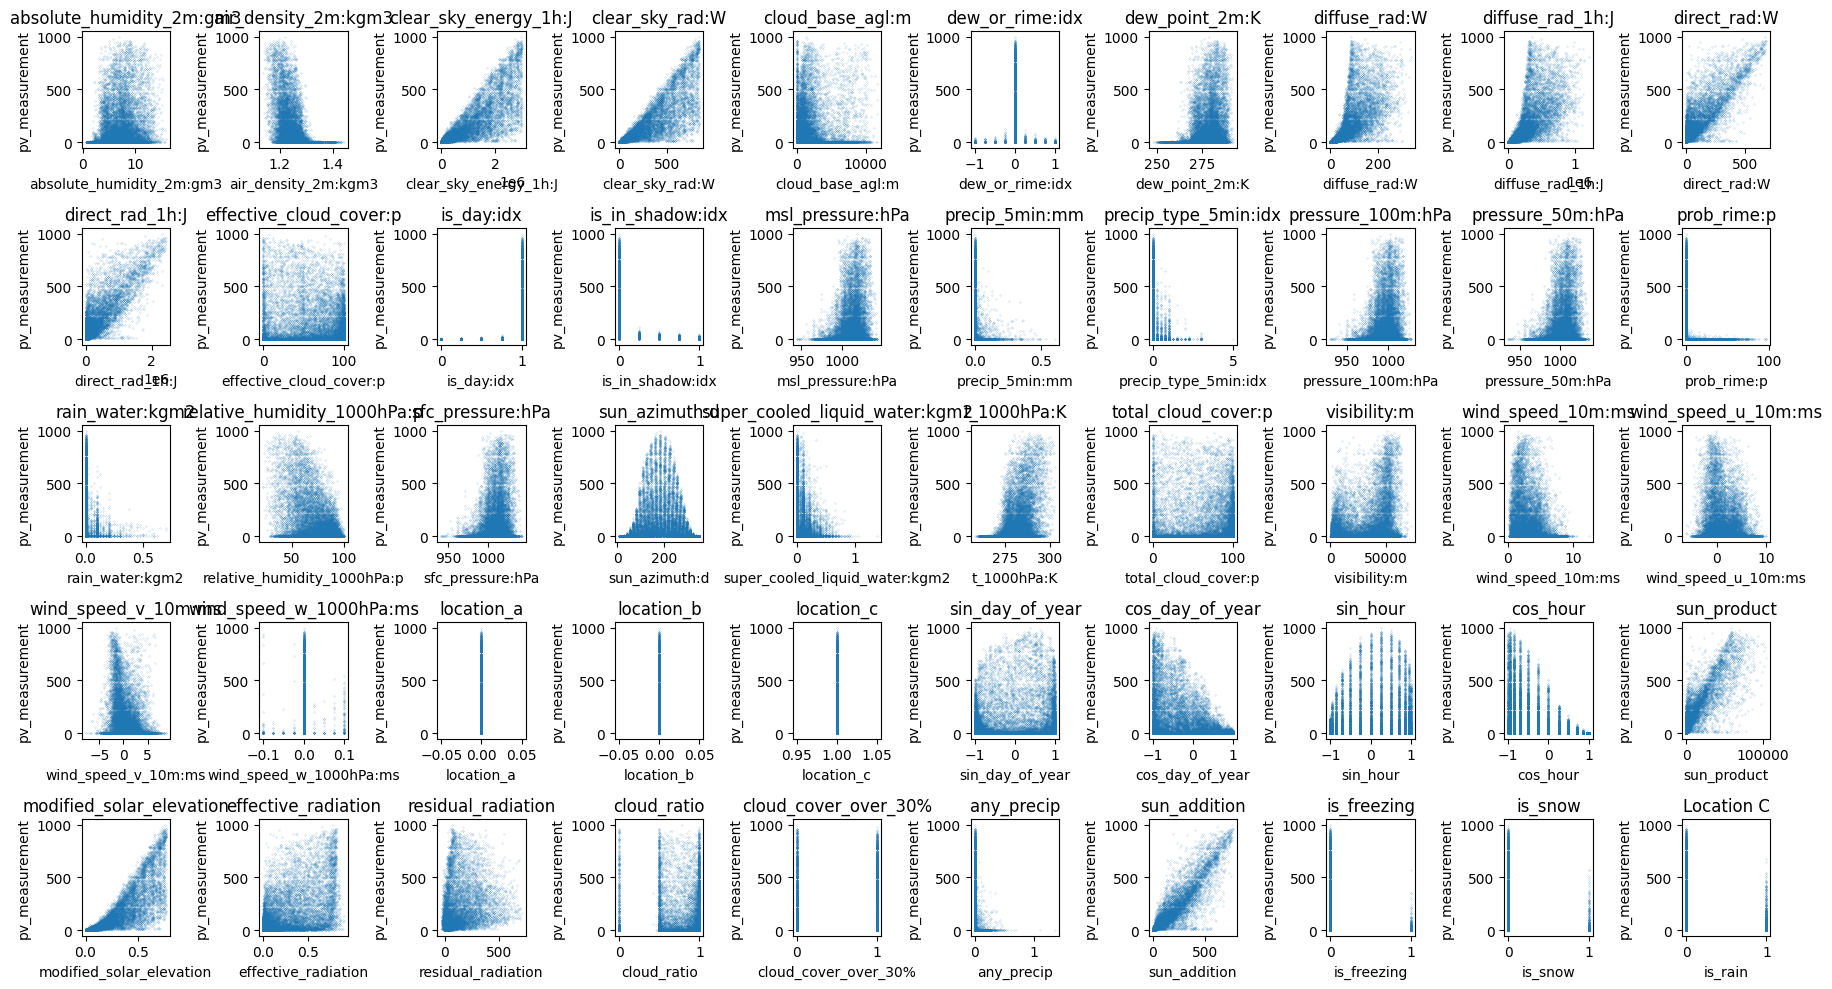

In [9]:
data_with_target_c = data_with_target[data_with_target['location_c'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_c.columns):
    ax.scatter(data_with_target_c[feature], data_with_target_c['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location C")
plt.savefig("results/figures/feature_engineering/location_c_correlation_with_pv.png")
plt.show()

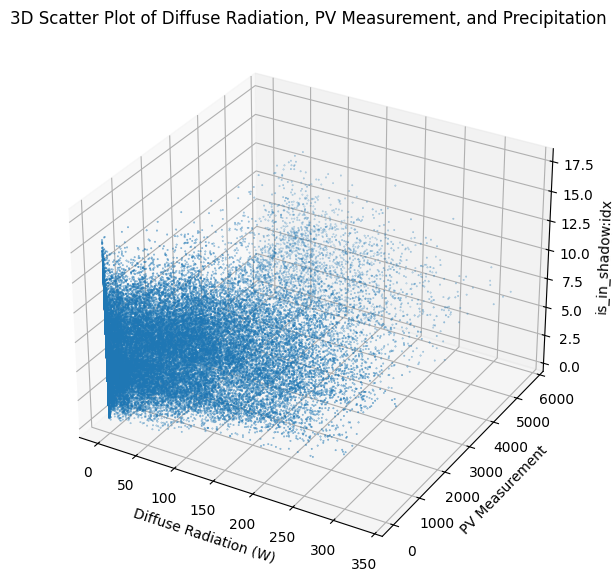

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_with_target['diffuse_rad:W'], data_with_target['pv_measurement'], data_with_target['absolute_humidity_2m:gm3'], s=0.1)

ax.set_xlabel('Diffuse Radiation (W)')
ax.set_ylabel('PV Measurement')
ax.set_zlabel('is_in_shadow:idx')

plt.title('3D Scatter Plot of Diffuse Radiation, PV Measurement, and Precipitation')
plt.savefig("results/figures/feature_engineering/3d_scatter_plot.png")
plt.show()

In [11]:

# pd.set_option('display.max_rows', 200)

mask = (data_with_target['direct_rad:W'] > 500) & (data_with_target['pv_measurement'] < 2000)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(5)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,any_precip,sun_addition,is_freezing,is_snow,is_rain,pv_measurement
13,8.850,1.22000,2824084.00,753.525024,0.000000,0.0,282.750000,85.274994,311109.65625,607.299988,2270718.250,0.000000,1.0,0.0,1028.474976,0.0,0.0,1015.700012,1021.674988,0.0,0.0,54.549999,1027.675049,222.358749,0.0,289.225006,0.000000,48689.476562,1.250,0.775,-1.00,0.0,0,1,0,0.347403,-0.937716,-0.258819,-0.965926,51787.503906,0.700825,0.804055,60.950043,0.000000,0,0.0,692.574951,0,0,0,928.0500
64,9.100,1.20025,2626170.00,767.924988,0.000000,0.0,283.299988,84.275002,296648.06250,632.849976,2157558.250,5.800000,1.0,0.0,1025.824951,0.0,0.0,1010.275024,1016.200012,0.0,0.0,52.250000,1022.099976,141.073242,0.0,290.799988,11.600000,52910.851562,2.900,-1.850,-2.25,0.0,0,0,1,0.331221,-0.943553,0.707107,-0.707107,53333.433594,0.712078,0.821561,50.800011,0.500000,0,0.0,717.125000,0,0,0,882.0000
230,9.175,1.22000,2530585.00,743.025024,2397.425049,0.0,283.049988,83.100006,323050.21875,595.424988,1962988.125,30.500000,1.0,0.0,1013.250000,0.0,0.0,1000.474976,1006.450012,0.0,0.0,73.775002,1012.450012,139.545746,0.0,285.750000,61.000000,47821.800781,0.625,0.200,-0.60,0.0,0,1,0,-0.143572,-0.989640,0.707107,-0.707107,49479.820312,0.694304,0.775705,64.500031,0.500000,1,0.0,678.525024,0,0,0,982.3875
375,8.650,1.18450,2614647.25,733.674988,2459.625000,0.0,282.500000,110.750000,370602.87500,505.049988,1887927.625,46.849998,1.0,0.0,1009.799988,0.0,0.0,997.375000,1003.174988,0.0,0.0,37.799999,1009.000000,178.890747,0.0,294.600006,68.975006,60343.250000,1.900,-1.200,1.50,0.0,0,1,0,-0.557468,-0.830198,0.258819,-0.965926,55934.285156,0.684181,0.722058,117.875000,0.679232,1,0.0,615.799988,0,0,0,504.5625
509,11.525,1.18600,2623813.75,767.549988,2993.100098,0.0,286.849976,151.125000,517312.50000,507.575012,1738573.375,38.450001,1.0,0.0,1010.700012,0.0,0.0,998.250000,1004.049988,0.0,0.0,54.400002,1009.900024,140.524261,0.0,294.174988,70.525002,48796.050781,1.900,-0.475,-1.80,0.0,0,1,0,0.282108,-0.959383,0.707107,-0.707107,76707.273438,0.712204,0.662613,108.849976,0.545197,1,0.0,658.700012,0,0,0,757.2750


In [12]:

mask = (data_with_target['direct_rad:W'] > 500) & (data_with_target['pv_measurement'] > 5000)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(5)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,any_precip,sun_addition,is_freezing,is_snow,is_rain,pv_measurement
1137,8.975,1.17650,2825782.5,808.900024,1743.349976,0.0,283.200012,104.800003,376626.59375,605.525024,2077285.500,14.825000,1.0,0.0,1008.200012,0.0,0.0,995.450012,1001.250000,0.0,0.0,40.500000,1007.075012,158.763000,0.000,293.549988,15.500000,61624.648438,3.525,0.575,3.475,0.0,1,0,0,-0.006451,-0.999979,5.000000e-01,-0.866025,63459.023438,0.745441,0.735119,98.574997,0.956452,0,0.0,710.325012,0,0,0,5049.00
1990,9.300,1.18500,2962503.0,829.349976,0.000000,0.0,283.750000,82.675003,296750.03125,674.099976,2400372.500,0.000000,1.0,0.0,1018.700012,0.0,0.0,1005.700012,1011.575012,0.0,0.0,42.000000,1017.450012,179.522995,0.000,293.399994,0.000000,59115.421875,3.750,-2.400,-2.850,0.0,1,0,0,0.027950,-0.999609,2.588190e-01,-0.965926,55731.218750,0.761239,0.810251,72.574997,0.000000,0,0.0,756.774963,0,0,0,5129.96
2596,8.200,1.20650,2748744.0,786.174988,2968.750000,0.0,281.500000,107.474998,369647.31250,591.424988,2073905.250,15.775000,1.0,0.0,1010.500000,0.0,0.0,997.500000,1003.450012,0.0,0.0,59.375000,1009.400024,161.412003,0.000,286.524994,24.799999,46642.000000,1.825,-0.775,-1.650,0.0,1,0,0,0.630072,-0.776537,5.000000e-01,-0.866025,63563.398438,0.722491,0.754492,87.275002,0.636089,0,0.0,698.899963,0,0,0,5142.72
2990,4.650,1.26600,2106313.0,609.825012,0.000000,0.0,273.024994,89.550003,316080.56250,500.149994,1721116.000,3.900000,1.0,0.0,1030.800049,0.0,0.0,1017.299988,1023.525024,0.0,0.0,53.875000,1029.775024,162.743256,0.000,278.100006,7.725000,42373.074219,0.900,-0.375,-0.825,0.0,1,0,0,0.976277,-0.216527,5.000000e-01,-0.866025,44788.433594,0.576643,0.817123,20.125015,0.504854,0,0.0,589.700012,0,0,0,5136.12
4278,10.200,1.18375,2878807.5,787.650024,2247.375000,0.0,285.024994,110.324997,407769.43750,555.700012,1948314.125,25.200001,1.0,0.0,1009.799988,0.0,0.0,997.099976,1002.900024,0.0,0.0,53.450001,1008.799988,200.455002,0.025,292.149994,27.674999,57492.925781,2.350,-1.150,-2.050,0.0,1,0,0,-0.228058,-0.973648,1.224647e-16,-1.000000,61307.601562,0.728673,0.676778,121.625015,0.910569,0,0.0,666.025024,0,0,0,5105.32


In [13]:
data_with_target

mask = (data_with_target['prob_rime:p'] > 10)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(200)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,any_precip,sun_addition,is_freezing,is_snow,is_rain,pv_measurement
33,4.175,1.28850,0.000000,0.000000,4710.725098,-1.00,271.250000,0.000000,0.000000,0.000000,0.000000,86.400002,0.0,1.0,1011.650024,0.0,0.0,995.974976,1002.250000,14.425000,0.0,83.574997,1008.550049,75.529999,0.0,274.175018,99.849998,46399.375000,1.825,-1.175,1.350,0.0,0,0,1,-0.242687,0.970105,0.707107,7.071068e-01,0.000000,0.000000,0.000000,0.000000,0.865298,1,0.0,0.0,0,0,0,0.0
41,5.700,1.26000,0.000000,0.000000,7924.000000,1.00,275.500000,0.000000,0.000000,0.000000,0.000000,46.525002,0.0,1.0,1002.900024,0.0,0.0,987.799988,993.900024,22.225000,0.0,82.925003,1000.000000,296.765991,0.0,281.075012,83.250000,40922.500000,2.250,0.350,2.225,0.0,0,0,1,-0.915546,0.402214,-0.965926,2.588190e-01,0.000000,0.000000,0.000000,0.000000,0.558859,1,0.0,0.0,0,0,0,0.0
47,3.400,1.29900,47882.425781,37.825001,0.000000,-0.75,268.475006,21.825001,39799.546875,21.674999,38986.949219,1.000000,1.0,0.5,1021.424988,0.0,0.0,1005.549988,1011.900024,21.674999,0.0,65.099998,1018.250000,102.880753,0.0,275.049988,1.975000,46470.199219,1.650,-0.475,1.550,0.0,0,0,1,0.955979,0.293434,1.000000,6.123234e-17,473.056885,0.075175,0.814223,-5.674999,0.506329,0,0.0,43.5,0,0,0,29.4
67,3.600,1.27250,0.000000,0.000000,1029.349976,-0.25,269.399994,0.000000,0.000000,0.000000,0.000000,32.224998,0.0,1.0,991.750000,0.0,0.0,976.375000,982.575012,10.175000,0.0,79.000000,988.775024,247.088257,0.0,274.799988,64.449997,44330.625000,1.850,-1.475,1.125,0.0,0,0,1,0.447945,0.894061,-0.866025,-5.000000e-01,0.000000,0.000000,0.000000,0.000000,0.500000,1,0.0,0.0,0,0,0,0.0
103,3.050,1.29650,0.000000,0.000000,2265.574951,-1.00,267.299988,0.000000,0.000000,0.000000,0.000000,100.000000,0.0,1.0,1008.849976,0.0,0.0,993.150024,999.450012,58.299999,0.0,81.599998,1005.750000,23.435501,0.0,273.225006,100.000000,30968.500000,1.800,-1.675,0.600,0.0,0,0,1,-0.357464,0.933927,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1,0.0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,5.825,1.23450,0.000000,0.000000,1979.649902,1.00,275.924988,0.000000,0.000000,0.000000,0.000000,74.050003,0.0,1.0,991.250000,0.0,0.0,976.200012,982.200012,19.225000,0.0,80.175003,988.299988,73.432503,0.0,281.975006,86.000000,47022.875000,1.825,0.700,1.700,0.0,0,0,1,-0.885725,0.464210,0.707107,7.071068e-01,0.000000,0.000000,0.000000,0.000000,0.861047,1,0.0,0.0,0,0,0,0.0
8670,5.000,1.26325,0.000000,0.000000,6024.024902,-1.00,273.649994,0.000000,0.000000,0.000000,0.000000,25.325001,0.0,1.0,999.250000,0.0,0.0,984.150024,990.275024,63.049999,0.0,83.199997,996.450012,179.370255,0.0,279.825012,32.450001,32899.574219,1.550,0.500,1.450,0.0,0,0,1,0.984306,0.176471,-0.258819,9.659258e-01,0.000000,0.000000,0.000000,0.000000,0.780431,0,0.0,0.0,0,0,0,0.0
8706,3.550,1.31850,3532.325195,6.000000,0.000000,-1.00,269.100006,4.500000,8084.250000,0.000000,0.000000,0.000000,0.5,1.0,1030.199951,0.0,0.0,1014.200012,1020.650024,61.175003,0.0,72.425003,1027.099976,88.719254,0.0,273.850006,0.000000,37315.375000,0.900,0.100,0.875,0.0,0,0,1,0.98112

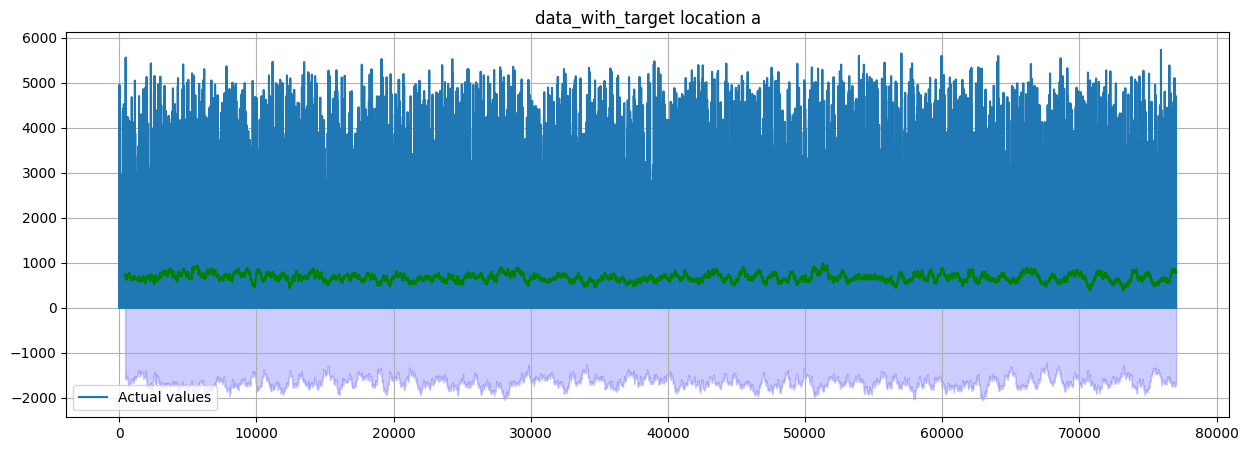

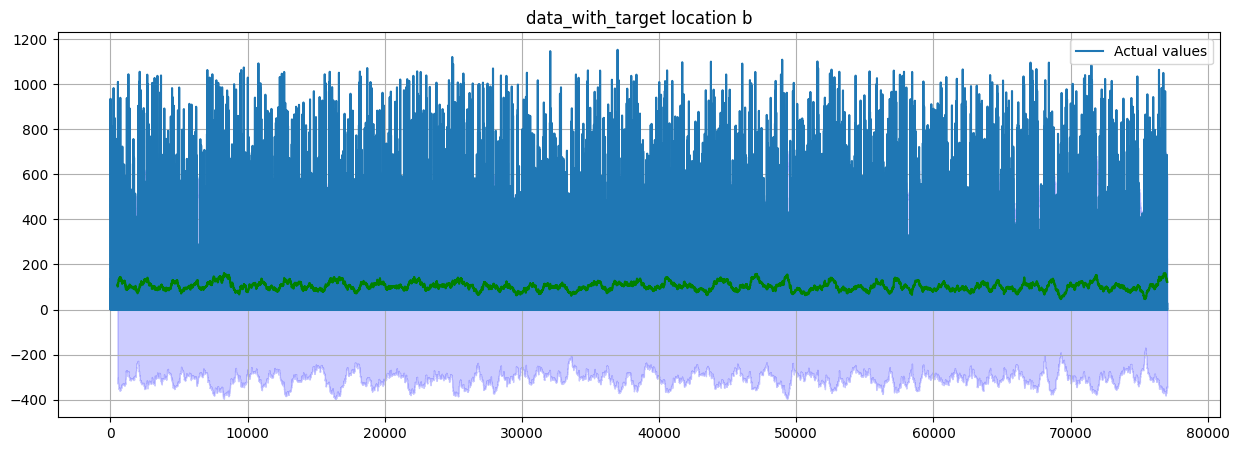

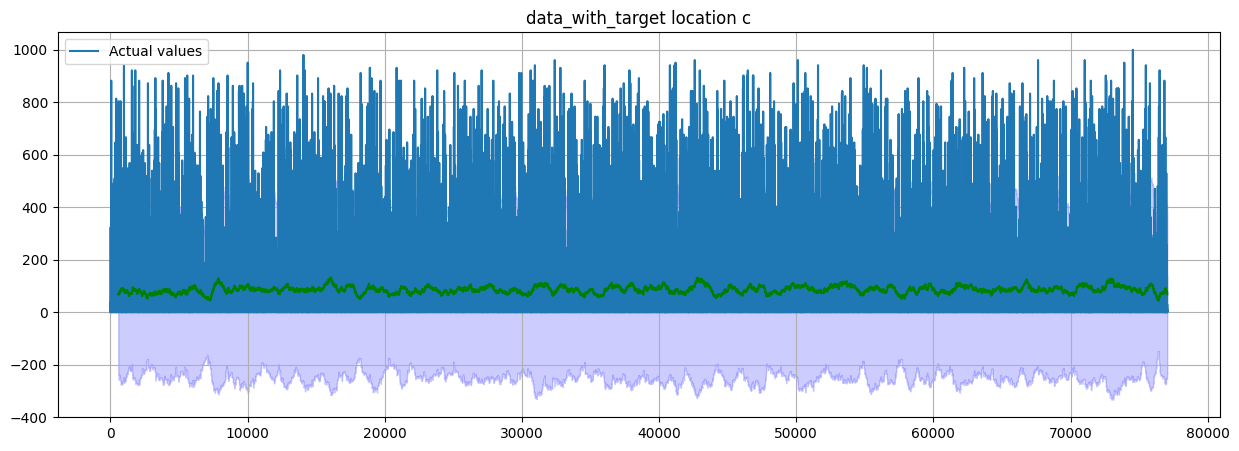

In [14]:
from src.visualization.plotting import plot_moving_average
# Compute moving averages for trend analysis for Location A, B and C
plot_moving_average(data_with_target_a['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location a")
plot_moving_average(data_with_target_b['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location b")
plot_moving_average(data_with_target_c['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location c")